Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [1]:
NAME = "PUNTAKARN KAEWSANGHAN"
STUDENT_ID = "61070139"

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# 1. Logistic Regression --- Single Feature

## 1.1 Load Iris dataset from sklearn library

In [3]:
iris = sklearn.datasets.load_iris()
print("Feature :", iris.feature_names)
print("Label :", iris.target_names)

Feature : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label : ['setosa' 'versicolor' 'virginica']


## 1.2 Define `Petal Length` (cm) as $X$ and a label vector $y$ when 1 = ‘Setosa’ and 0 = ‘Not Setosa’


In [4]:
_X = iris.data[:, 2].reshape(-1, 1)
_X.shape

(150, 1)

In [5]:
y = (iris.target == 0).astype(int).reshape(-1, 1)
y.shape

(150, 1)

## 1.3 Write a function to add a bias value/vector to X in the following format:

$$
    X = addBias(X)
$$

In [6]:
def addBias(X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X

In [7]:
X = addBias(_X)
X.shape

(150, 2)

## 1.4 Write a function to create $\theta$ (Weight) for our model in the following format:

$$
    \theta = createTheta(X)
$$

In [8]:
def createTheta(X):
    return np.ones((X.shape[1], 1))

In [9]:
theta0 = createTheta(X)
theta0

array([[1.],
       [1.]])

## 1.5 Write a function to calculate Sigmoid function in the following format:

$$
    s = sigmoid(z)
$$

Then plot and observe the sigmoid function. Explain the characteristic of sigmoid function.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
x = np.linspace(-10, 10, 100)

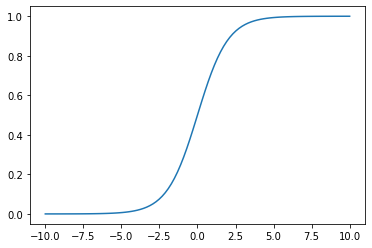

In [12]:
plt.plot(x, sigmoid(x));

## 1.6 Write a function to calculate the model’s predicted values in the following format:

$$
    y\_predicted = predict(X, \theta)
$$

In [13]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

## 1.7 Write a function to calculate the model’s accuracy in the following format:

$$
    Acc = accuracy(y\_predicted, y, threshold)
$$

$threshold$ is a cut-off value to predict either ‘0’ or ‘1’.

In [14]:
def accuracy(y_predicted, y, threshold):
    prediction = y_predicted > threshold
    return np.mean(prediction == y)

accuracy(predict(X, theta0), y, threshold=0.5)

0.3333333333333333

## 1.8 Write a function to calculate a cost function value—Binary Cross-entropy—in the following format:

$$
    J = computeCostFunction(X, y, theta)
$$



In [15]:
def computeCostFunction(X, y, theta):
    prediction = predict(X, theta)
    return -np.mean(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))

computeCostFunction(X, y, theta0)

3.967448684501259

## 1.9 Write a function to find the optimal weight of Logistic Regression by using Gradient Descent Algorithm in the following format:

$$
    [θ, J_{History}] = gradientDescent(X, y, θ, α, n_{iteration})
$$

where $\alpha$ is a learning rate, $n_{iteration}$ is the number of iteration, and $J_{History}$ is a vector
that store $J$ for every iteration.

In [16]:
def gradientDescent(X, y, theta0, alpha, n_iteration, verbose=False):
    j_history = []
    theta = np.copy(theta0)
    n_samples = X.shape[0]

    for i in range(n_iteration):
        prediction = predict(X, theta)
        theta = theta - (alpha / n_samples * np.dot(X.T, prediction - y))
        loss = computeCostFunction(X, y, theta)
        j_history.append(loss)
        if verbose:
            print(f'Iteration: {i} Loss: {loss}')
        
    return theta, j_history

## 1.10 Train a model with α = 0.3, n_iteration = 3000, and plot the convergence curves

In [17]:
theta, j_history = gradientDescent(X, y, theta0=theta0, alpha=0.3, n_iteration=3000)

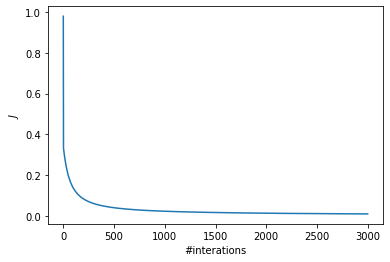

In [18]:
plt.plot(j_history);
plt.ylabel("$J$");
plt.xlabel("#interations");

## 1.11 Plot the decision boundary of this model

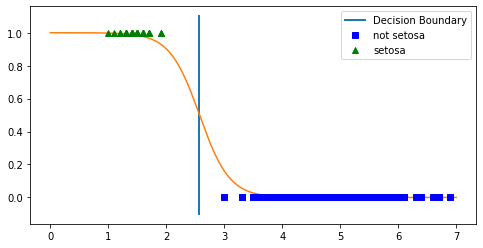

In [19]:
X_lin = np.linspace(0, 7, 1000).reshape(-1,1)
X_new = addBias(X_lin)
y_pred = predict(X_new,theta)
decision_boundary = X_lin[y_pred>=0.5][-1]

plt.figure(figsize=(8,4))
plt.plot([decision_boundary,decision_boundary], [-0.1,1.1], linewidth=2, label='Decision Boundary')
y_lin = sigmoid(theta[0]+theta[1]*X_lin)
plt.plot(X_lin,y_lin)
plt.plot(X[:, 1:][y==0],y[y==0],'bs',label='not setosa')
plt.plot(X[:, 1:][y==1],y[y==1],'g^',label='setosa')
plt.legend();

## 1.12 Print the accuracy of the model

In [20]:
acc = accuracy(predict(X, theta), y, threshold=0.5)
print(f'Accuracy: {acc*100}%')

Accuracy: 100.0%


# 2. Logistic Regression – Multiple Feature

## 2.1 Load Iris dataset from sklearn library

In [21]:
# YOUR CODE HERE
iris_dataset = sklearn.datasets.load_iris()

## 2.2 Define Sepal Length (cm) and Sepal Width (cm) as X and Label vector y when considers only ‘Setosa’.

In [22]:
# YOUR CODE HERE
# Select 2 Column; Sepal Length, Sepal Width
X_multi_feature = iris_dataset.data[:,0:2]
X_multi_feature.shape

(150, 2)

In [23]:
# Select Target == 0 (Setosa)
y_multi_feature = (iris_dataset.target == 0).astype(int).reshape(-1, 1)
y_multi_feature.shape

(150, 1)

## 2.3 Train a model with α = 0.1, n_iteration = 1000 ,and plot the convergence curves

In [24]:
# YOUR CODE HERE
# Add Bias to X
X_multi_feature = addBias(X_multi_feature)
X_multi_feature.shape

(150, 3)

In [25]:
# Create Theta = 1
theta_multi_feature = np.ones((X_multi_feature.shape[1],1))
theta_multi_feature

array([[1.],
       [1.],
       [1.]])

In [26]:
# Training Model
theta_history_multi_feature, j_history_multi_feature = gradientDescent(X_multi_feature, y_multi_feature, theta0=theta_multi_feature, alpha=0.1, n_iteration=1000)

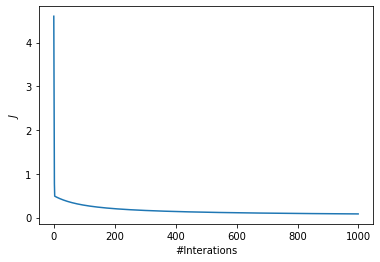

In [27]:
# Plot Convergence Curves
plt.plot(j_history_multi_feature);
plt.ylabel("$J$"); 
plt.xlabel("#Interations");

## 2.4 Plot the decision boundary of the model

In [28]:
# YOUR CODE HERE
theta_history_multi_feature

array([[ 1.47202116],
       [-3.0490218 ],
       [ 4.76857986]])

In [29]:
X_lin  = np.linspace(min(iris_dataset.data[:,0:1])-0.25, max(iris_dataset.data[:,0:1]), 1000).reshape(-1,1)
theta_ = theta_history_multi_feature

mx_ =  -(theta_[1]*X_lin)/theta_[-1]
c_  =  -(theta_[0])/theta_[-1]

slove = mx_ + c_

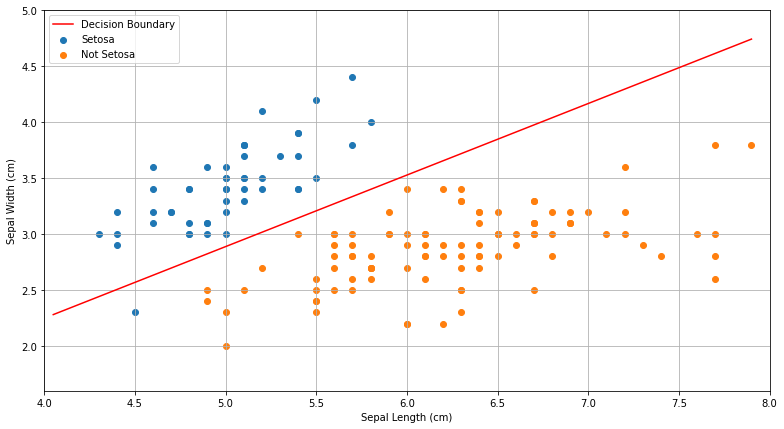

In [30]:
figure = plt.figure(figsize = (13, 7))
plt.plot(X_lin,(slove).reshape(-1,1),'r',label='Decision Boundary')
plt.scatter(X_multi_feature[:,1][iris.target==0] , X_multi_feature[:,2][iris.target==0],label='Setosa')
plt.scatter(X_multi_feature[:,1][iris.target!=0], X_multi_feature[:,2][iris.target!=0],label='Not Setosa')
plt.xticks(np.arange(4,8.5,.5))
plt.ylim(1.6,5)
plt.xlim(4,8)
plt.ylabel('Sepal Width (cm)')
plt.xlabel('Sepal Length (cm)')
plt.legend()
plt.grid()

## 2.5 Print the accuracy of the model

In [31]:
# YOUR CODE HERE
acc_ = accuracy(predict(X_multi_feature, theta_), y_multi_feature, threshold=0.5)
print(f'Accuracy : {acc_*100}%')

Accuracy : 99.33333333333333%


# 3. Multi-class Classification – One-Versus-One

## 3.1 Load Iris dataset from sklearn library

In [32]:
iris = sklearn.datasets.load_iris()
print("Feature :", iris.feature_names)
print("Label :", iris.target_names)

Feature : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label : ['setosa' 'versicolor' 'virginica']


## 3.2 Define Petal length (cm), Petal width (cm) as X and Iris target as y

In [33]:
_X = iris.data[:, 2:]
X = addBias(_X)
y = iris.target

## 3.3 Train a model to classify three classes of Iris by using One-Versus-One scheme with α = 0.3, n_iteration = 3000, and plot the convergence curve of each classifier.

In [34]:
from itertools import combinations
comb = np.array(list(combinations([0, 1, 2], 2)))

In [35]:
alpha = 0.3
n_iteration = 3000

theta_list = []
j_history_list = []

for i in comb:
    print(f'Train combinations of class: {i}')
    
    label_zero = i[0]
    label_one = i[1]
    
    # Split data for each combination class
    selector = np.logical_or(y==label_zero, y==label_one)
    X_train = _X[selector]
    y_train = y[selector].reshape(-1, 1)
    
    # Re-label y to binary --- 0 and 1
    y_train[y_train == label_zero] = 0
    y_train[y_train == label_one] = 1
    
    X_train = addBias(X_train)
    theta = createTheta(X_train)
    theta, j_history = gradientDescent(X_train, y_train, theta, alpha, n_iteration, verbose=False)
    
    theta_list.append(theta)
    j_history_list.append(j_history)

Train combinations of class: [0 1]
Train combinations of class: [0 2]
Train combinations of class: [1 2]


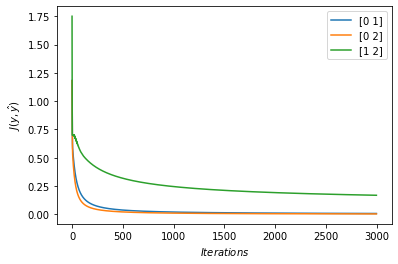

In [36]:
for com, j_hist in zip(comb, j_history_list):
    plt.plot(j_hist, label=str(com))
    plt.xlabel("$Iterations$")
    plt.ylabel("$J(y, \hat{y})$")
    plt.legend()

## 3.4 Write a function to calculate the accuracy of One Versus One algorithm in the following format:
$$
ovaAcc = accuracyOvo(X, theta\_list, y)
$$

In [37]:
def accuracyOvo(X, theta_list, y):
    predict_list = []
    
    for theta, i in zip(theta_list, comb):
        y_pred = predict(X, theta)
        y_pred = (y_pred > 0.5).astype(int)
        y_pred = i[y_pred.flatten()]
        
        predict_list.append(y_pred)
    predict_list = np.array(predict_list).T
    
    majority_preds = []
    for i, pred in enumerate(predict_list):
        unique_value, count = np.unique(pred, return_counts=True)
        majority_preds.append(unique_value[np.argmax(count)])
    
    return np.mean(y == majority_preds)

## 3.5 Print the accuracy of the model

In [38]:
print("Accuracy of the model by One vs One strategy is %f %%" %(accuracyOvo(X, theta_list, y) * 100))

Accuracy of the model by One vs One strategy is 96.000000 %
